In [113]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median

Прочитайте csv файл (використовуйте функцію read_csv)

In [114]:
bestselling_book = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [115]:
bestselling_book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [116]:
bestselling_book.shape

(550, 7)

Про скільки книг зберігає дані датасет? <b>Відповідь:</b> 550

In [117]:
bestselling_book.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

<b>Первинне дослідження даних</b>

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [118]:
bestselling_book.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) <b>Відповідь:</b> ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [119]:
bestselling_book['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? <b>Відповідь:</b> 'Non Fiction', 'Fiction' 

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

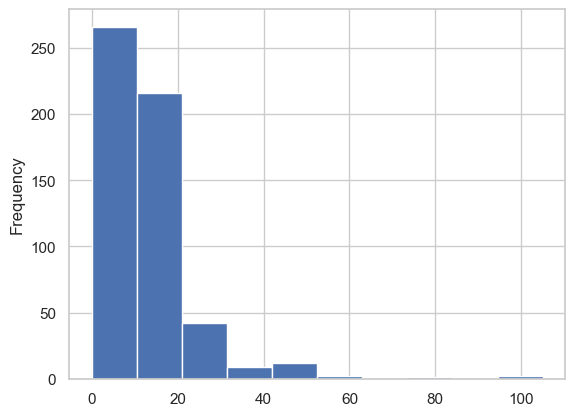

In [120]:
bestselling_book['price'].plot.hist()
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [121]:
bestselling_book['price'].agg(['max', 'min', 'mean', 'median'])

max       105.0
min         0.0
mean       13.1
median     11.0
Name: price, dtype: float64

Максимальна ціна? <b>Відповідь:</b> 105.0 

Мінімальна ціна? <b>Відповідь:</b> 0.0  

Середня ціна? <b>Відповідь:</b> 13.1 

Медіанна ціна? <b>Відповідь:</b> 11.0 

<b>Пошук та сортування даних</b>

Який рейтинг у датасеті найвищий?

In [122]:
bestselling_book['user_rating'].agg(['max'])

max    4.9
Name: user_rating, dtype: float64

<b>Відповідь:</b> 4.9

Скільки книг мають такий рейтинг?

In [123]:
bestselling_book.query('user_rating == 4.9')['user_rating'].count()

52

<b>Відповідь:</b> 52

Яка книга має найбільше відгуків?

In [124]:
max_reviews = bestselling_book['reviews'].agg(['max'])
bestselling_book.query('reviews == @max_reviews.values[0]')

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


<b>Відповідь:</b> Where the Crawdads Sing

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [125]:
best_books = bestselling_book.query('year == 2015')
max_price = best_books['price'].agg(['max'])
best_books.query('price == @max_price.values[0]')

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


<b>Відповідь:</b> Publication Manual of the American Psychologic...	

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

In [126]:
bestselling_book.query("year == 2010 & genre == 'Fiction'")['genre'].count()

20

<b>Відповідь:</b> 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [127]:
bestselling_book.query('user_rating == 4.9 & (year == 2010 | year == 2011)')['name'].count()

1

<b>Відповідь:</b> 1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [128]:
sorted_books = bestselling_book.query('year == 2015 & price < 8').sort_values('price')

Яка книга остання у відсортованому списку? 

In [129]:
sorted_books.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


<b>Відповідь:</b> Old School (Diary of a Wimpy Kid #10)

<b>Агрегування даних та з'єднання таблиць</b>

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [130]:
bestselling_book.groupby(['genre']).agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Максимальна ціна для жанру Fiction: 82

Мінімальна ціна для жанру Fiction: 0

Максимальна ціна для жанру Non Fiction: 105 

Мінімальна ціна для жанру Non Fiction: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [131]:
counted_book = bestselling_book.groupby(['author'])['name'].agg(['count'])
counted_book

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця? 

In [132]:
counted_book.shape

(248, 1)

<b>Відповідь:</b> (248, 1)

Який автор має найбільше книг? 

In [133]:
max_count = counted_book['count'].max()
counted_book.query('count == @max_count')

,count
author,
Jeff Kinney,12


<b>Відповідь:</b> Jeff Kinney Скільки книг цього автора? <b>Відповідь:</b> 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [134]:
average_rate = bestselling_book.groupby(['author'])['user_rating'].agg(['mean'])
average_rate

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний? 

In [135]:
min_rate = average_rate['mean'].min()
average_rate.query('mean == @min_rate')

,mean
author,
Donna Tartt,3.9


<b>Відповідь:</b> Donna Tartt Який у цього автора середній рейтинг? <b>Відповідь:</b> 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [136]:
df = pd.concat([counted_book, average_rate], axis=1)
df

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [137]:
df = df.sort_values(['count', 'mean'])

Який автор перший у списку?

In [138]:
df.head(1)

,count,mean
author,,
Muriel Barbery,1,4.0


<b>Відповідь:</b> Muriel Barbery

<b>Візуалізація</b>

c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


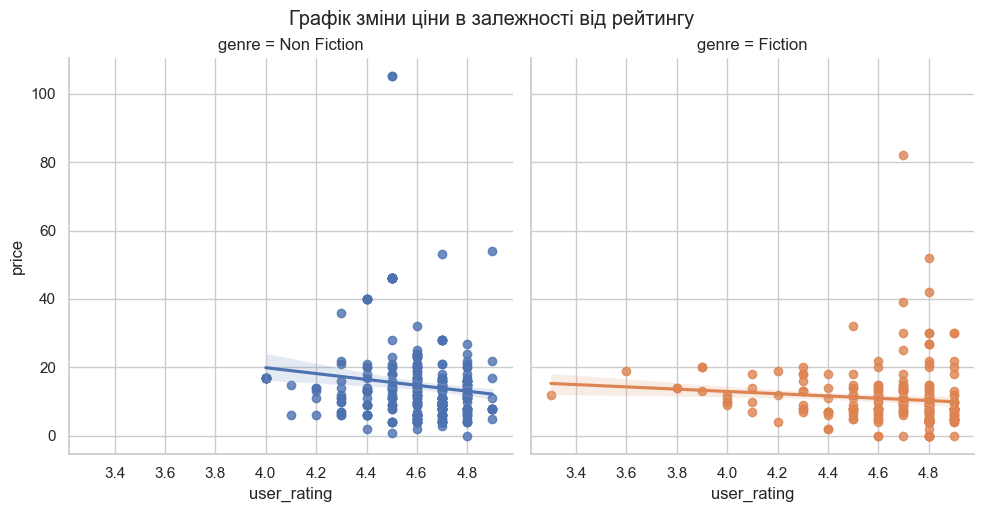

In [139]:

sns.lmplot(x="user_rating", y="price", hue="genre", col="genre", data=bestselling_book).fig.suptitle("Графік зміни ціни в залежності від рейтингу", y=1.02)
plt.show()

c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irada\.venv\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


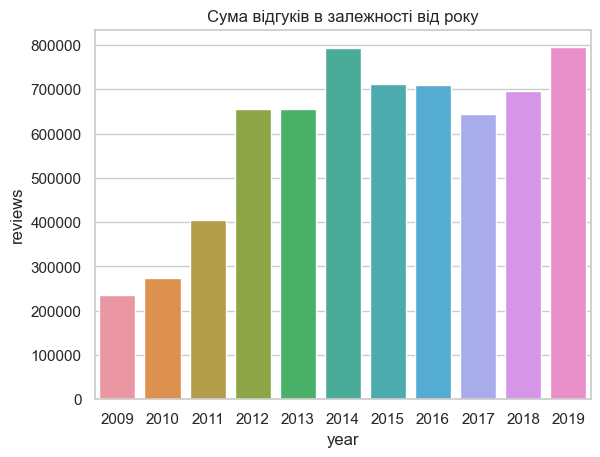

In [140]:
year_data = bestselling_book.groupby('year').agg({'reviews': 'sum'})
sns.barplot(data=year_data, y='reviews', x=year_data.index)
plt.title('Сума відгуків в залежності від року')
plt.show()

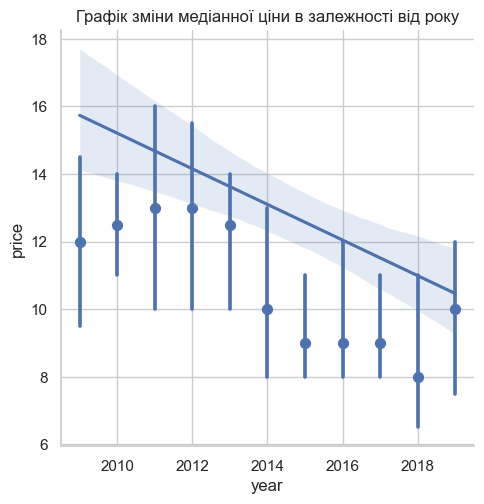

In [141]:
sns.lmplot(data=bestselling_book.sort_values(by='user_rating', ascending=True),
             x="year",
             y="price",
           x_estimator=median)
plt.title('Графік зміни медіанної ціни в залежності від року')
plt.show()